# PD 

PD (probability of default) is a measure of how  


Discrete
- categorical
- finite number of values like A,B,B2

Continuous
- Numerical
- Infinite number of values


Distinctive feature of the PD model是把continuous data bucket到categorial values中去,like a score card, 像PR一样，不同年龄的bucket, 学校地点的bucket etc.



Bucketing分为`Coarse classing` and `fine classing`.

![](./assets/1.png)



In [164]:
import pandas as pd
import numpy as np

## Explore Data

In [165]:
loan_data_backup = pd.read_csv("../data/loan_data_2007_2014.csv")

/var/folders/ys/p64w8p0x29x2zwj61fscpjd40000gn/T/ipykernel_2699/2729736447.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv("../data/loan_data_2007_2014.csv")


In [166]:
loan_data = loan_data_backup.copy()
loan_data.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
# unlimited data
pd.options.display.max_columns = None
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [168]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Pre-processing


### Continuous Variables
Start off cleaning continuous variables

- `term`: 多久还完，36months, 30months.
- `emp_length`: employee length.

先来处理emp_length


In [169]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [170]:
def clean_emp_length(experience):
    """convert the emp_length column and convert to integer

    :param _type_ experience: _description_
    :return _type_: _description_
    """
    # leave empty
    if pd.isna(experience):
        return np.nan
    if 'year' in experience:
        res = experience.split()[0]
        if res == "<":
            return 0
        elif '+' in res:
            return float(res.replace('+',''))
        else:
            return float(res)
    
    return np.nan
        

In [171]:
loan_data['emp_length_int'] = loan_data['emp_length'].apply(clean_emp_length)
loan_data['emp_length_int']

0         10.0
1          0.0
2         10.0
3         10.0
4          1.0
          ... 
466280     4.0
466281    10.0
466282     7.0
466283     3.0
466284    10.0
Name: emp_length_int, Length: 466285, dtype: float64

In [172]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [173]:
loan_data['term_int'] = loan_data['term'].apply(lambda x: float(x.strip().split()[0]))
loan_data['term_int']

0         36.0
1         60.0
2         36.0
3         36.0
4         60.0
          ... 
466280    60.0
466281    60.0
466282    60.0
466283    36.0
466284    36.0
Name: term_int, Length: 466285, dtype: float64

Now, we look into 

- `earliest_cr_line`: The month the borrower's earliest reported credit line was opened. 第一次open credit (开信用卡，tele bill等)
- `issue_date`

For str -> datetime, it is typically three steps:

- convert to `datetime`
- Set a `reference date`, and based on granularity required, convert to months, days or years w.r.t. the reference date

In [174]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [175]:
loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line'].apply(lambda x: pd.to_datetime(x,format='%b-%y'))
loan_data['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

Also, we need to havd a `reference date` for the datetime. Let's assume it's to be `2017-12-01`,


In [176]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

It's more practical to convert it to month (Just like the Horizon project) 

In [177]:
reference_date = pd.to_datetime('2017-12-01')

loan_data['mths_since_earliest_cr_line'] = 12 * (reference_date.year - loan_data['earliest_cr_line_date'].dt.year) 
+ (reference_date.month - loan_data['earliest_cr_line_date'].dt.month)

loan_data['mths_since_earliest_cr_line']

0         384.0
1         216.0
2         192.0
3         252.0
4         252.0
          ...  
466280    168.0
466281    240.0
466282    192.0
466283    168.0
466284    204.0
Name: mths_since_earliest_cr_line, Length: 466285, dtype: float64

In [178]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        234.244578
std          93.952481
min        -612.000000
25%         180.000000
50%         216.000000
75%         276.000000
max         576.000000
Name: mths_since_earliest_cr_line, dtype: float64

Check why there will be negative values

In [179]:
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-540.0
1770,Sep-68,2068-09-01,-612.0
2799,Sep-64,2064-09-01,-564.0
3282,Sep-67,2067-09-01,-600.0
3359,Feb-65,2065-02-01,-576.0
...,...,...,...
464003,Jan-68,2068-01-01,-612.0
464260,Jul-66,2066-07-01,-588.0
465100,Oct-67,2067-10-01,-600.0
465500,Sep-67,2067-09-01,-600.0


Highly likely, it's due to Apr-67 has been interpreted to 2067 instead of 1067. Let's impute it to a reasonable value like `maximum observed difference`,

In [180]:
# conservatively assume to be maximum observed difference
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

/var/folders/ys/p64w8p0x29x2zwj61fscpjd40000gn/T/ipykernel_2699/3294124690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [181]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        237.133986
std          86.370502
min          72.000000
25%         180.000000
50%         216.000000
75%         276.000000
max         576.000000
Name: mths_since_earliest_cr_line, dtype: float64

Now, `mths_since_earliest_cr_line` is clean, let's move to `issue_date` 

In [182]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [183]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [184]:
loan_data['issue_d_date'] = loan_data['issue_d'].apply(lambda x: pd.to_datetime(x,format='%b-%y'))

loan_data['issue_d_date']

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
466280   2014-01-01
466281   2014-01-01
466282   2014-01-01
466283   2014-01-01
466284   2014-01-01
Name: issue_d_date, Length: 466285, dtype: datetime64[ns]

In [185]:
reference_date = pd.to_datetime('2017-12-01')

loan_data['mths_since_issue_d'] = 12 * (reference_date.year - loan_data['issue_d_date'].dt.year) 
+ (reference_date.month - loan_data['issue_d_date'].dt.month)

loan_data['mths_since_issue_d']

0         72
1         72
2         72
3         72
4         72
          ..
466280    36
466281    36
466282    36
466283    36
466284    36
Name: mths_since_issue_d, Length: 466285, dtype: int32

In [186]:
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         46.340045
std          14.122490
min          36.000000
25%          36.000000
50%          36.000000
75%          48.000000
max         120.000000
Name: mths_since_issue_d, dtype: float64

### Discrete Variables

A couple of them to care, 

- grade
- sub_grade
- home_ownership
- verification_status
- loan_status
- purpose
- addr_state
- initial_list_status

We wish to convert disc to dummy variables. 

|num_category|num_dummy_variables|
|-|-|
|2|1|
|3|2|
|k|k-1|


In [187]:
discrete_cols = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status',]

In [188]:
loan_data[discrete_cols]

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status
0,B,B2,RENT,Verified,Fully Paid,credit_card,AZ,f
1,C,C4,RENT,Source Verified,Charged Off,car,GA,f
2,C,C5,RENT,Not Verified,Fully Paid,small_business,IL,f
3,C,C1,RENT,Source Verified,Fully Paid,other,CA,f
4,B,B5,RENT,Source Verified,Current,other,OR,f
...,...,...,...,...,...,...,...,...
466280,C,C2,MORTGAGE,Source Verified,Current,debt_consolidation,TX,w
466281,D,D5,MORTGAGE,Verified,Charged Off,debt_consolidation,TN,f
466282,D,D1,MORTGAGE,Verified,Current,debt_consolidation,OH,f
466283,A,A4,OWN,Verified,Fully Paid,credit_card,CA,w


In [189]:
for i in range(len(discrete_cols)):
    print(discrete_cols[i])
    print(loan_data[discrete_cols[i]].unique())

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status
['Verified' 'Source Verified' 'Not Verified']
loan_status
['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
purpose
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
addr_state
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK

In [190]:
pd.get_dummies(loan_data['grade'],
               prefix='grade',
               prefix_sep=':',)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
466280,False,False,True,False,False,False,False
466281,False,False,False,True,False,False,False
466282,False,False,False,True,False,False,False
466283,True,False,False,False,False,False,False


In [191]:
pd.get_dummies(loan_data['sub_grade'])

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
466281,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
466282,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
466283,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [192]:
def dummify_discrete(df,cols,prefix_sep = ':'):
    """dummify selected discrete categories 

    :param _type_ df: _description_
    :param _type_ cols: _description_
    :param _type_ prefix: _description_
    :param str prefix_sep: _description_, defaults to ':'
    """
    dummies = []
    for col in cols:
        tmp = pd.get_dummies(df[col],
                             prefix=str(col),
                             prefix_sep=prefix_sep,)
        dummies.append(tmp)
        
    res = pd.concat(dummies,axis = 1)

    return res

    

In [193]:
res = dummify_discrete(df = loan_data,cols = discrete_cols,)
res

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,F

In [194]:
loan_data = pd.concat([loan_data,res],axis = 1)
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Null checking

Some helpful fcns are `.isnull()`

To deal with missing values, we either

- impute
- delete it

In [195]:
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [196]:
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 207, dtype: int64

In [197]:
missing_cols = loan_data.columns[loan_data.isnull().sum()>0].to_list()
missing_cols  

['emp_title',
 'emp_length',
 'annual_inc',
 'desc',
 'title',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'emp_length_int',
 'earliest_cr_line_date',
 'mths_since_earliest_cr_line']

We are going to deal with

- `annual_inc`: impute with mean of non-missing
- `total_rev_hi_lim`: impute with `funded_amnt`

for the following, replace with zeros
- `mths_since_earliest_cr_line`
- `acc_now_delinq`
- `total_acc`
- `pub_rec`
- `open_acc`
- `inq_last_6mths`
- `delinq_2yrs`
- `emp_length_int`



In [198]:
loan_data['total_rev_hi_lim']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
466280    29900.0
466281    39400.0
466282    13100.0
466283    53100.0
466284    16000.0
Name: total_rev_hi_lim, Length: 466285, dtype: float64

In [199]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'],inplace=True,)

In [200]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [201]:
def fillna_with_mean(df,cols):
    for col in cols:
        mean = df[col].mean()
        df[col].fillna(mean,inplace=True)
    

def fillna_with_zero(df,cols):
    for col in cols:
        df[col].fillna(0,inplace=True)
        

fillna_with_mean(loan_data,["annual_inc"])
fillna_with_zero(loan_data,[
    'mths_since_earliest_cr_line',
    'acc_now_delinq',
    'total_acc',
    'pub_rec',
    'open_acc',
    'inq_last_6mths',
    'delinq_2yrs',
    'emp_length_int'
])


/var/folders/ys/p64w8p0x29x2zwj61fscpjd40000gn/T/ipykernel_2699/3132386509.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean,inplace=True)
/var/folders/ys/p64w8p0x29x2zwj61fscpjd40000gn/T/ipykernel_2699/3132386509.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [202]:
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 207, dtype: int64

## Data Preparation

In this section, we will discuss data preparation work for both dependent and independent variables.

### Dependent variable

We start off by cleaning our dependent variable, `good_bad` column to determine whether default happens.

The we need a threshold value to determine whether a loan is default.

> Interpretability is important in such model by regulatory organization and it enforces simplicity in the model development phase to reduce convoluted model. That's why we use only `binary indicator` AKA `dummy variable`.





In [203]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [204]:
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [205]:
loan_data['good_bad'] = loan_data['loan_status'].apply(lambda x: 0 if x in ["Charged Off",
                                                  "Default",
                                                  "Does not meet the credit policy. Status:Charged Off",
                                                  "Late (31-120 days)"] else 1)

loan_data[['good_bad','loan_status']].head(10)

,good_bad,loan_status
0,1,Fully Paid
1,0,Charged Off
2,1,Fully Paid
3,1,Fully Paid
4,1,Current
5,1,Fully Paid
6,1,Current
7,1,Fully Paid
8,0,Charged Off
9,0,Charged Off


### Independent Variable

We need to prepare data for both discrete and continuous. For discrete, it's straight forward. For continuous, we use fine-classing (idea of bucketing). Continuous数据三部曲, 

- `fine classing`: convert `debt to income ratio` into 50 categories of 2% each.
- `determine weight of evidence` of each category
- `coarse classing`

Of cuz we also need 权重 to determine relative importance of feature. Weight of evidence (`WoE`) is used in risk modeling,

$$
\begin{equation}
WoE_i = ln\left(\frac{\%\;of\; good}{\%\;of\;bad}\right)
\end{equation}
$$

假设我们有两个category, higher education and no higher education. 然后计算他们的default率，

![](./assets/2.png)

```mermaid
flowchart TD
a["fine classing"]
b["weight of evidence"]
c["coarse classing"]

a --> b
b --> c
```

|-|description|example|
|-|-|-|
|fine classing|divide continuous variable into roughly equal finite categories according to an **internal criteria**, such as the values of the variable or the number of cases in each category|把每个人的税后收入，归于50个bucket, 每个bucket中的人数相等|
|weight of evidence|The extent to which a categorical independent variable explains the difference of a categorical outcome variable|权重, |
|coarse classing|splitting a variable into categories according to an **external criteria** that show how much the categories explain another variable, such as weight of evidence|-|

### Information Value


`Information value` is used for pre-selecting the features and IV shows the extent to which an original independent variable, split into categories, is informative of an outcome variable.

$$
\text{IV} = \sum_{i=1}^{n} (\text{WOE}_i - \text{Overall WOE}) \times (\text{Distribution of Good}_i - \text{Distribution of Bad}_i)

$$


Typically, it's tabulated as follow

![](https://miro.medium.com/v2/resize:fit:970/1*prl00Y2OtCtdYj6LmTz2eQ.png)


Then we can determine higher education is a weak predictor (explained by IV) but it's significant with whether it's a good or bad borrower

![](./assets/3.png)

### Splitting Data

To avoid overfitting, we typically divide data up to test set and train set (90%/10% or 80%/20%)

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
# good_bad: dependent variable
train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 211752      211752   1369610    1614175       3600         3600   
 466196      466196  10074898   11927030      16800        16800   
 460022      460022  10565175   12447279      28000        28000   
 175225      175225   2945281    3557507       3600         3600   
 322247      322247  23973440   26346381      19200        19200   
 ...            ...       ...        ...        ...          ...   
 30337        30337    511053     660055       8000         8000   
 69751        69751   8544753   10296904      11500        11500   
 367719      367719  19206337   21409062       9000         9000   
 301174      301174  28112706   30625866      24250        24250   
 53935        53935   9208493   11030418       8400         8400   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 211752           3600.0   36 months     15.81       126.23     C        C4   
 466196          16700.0

You can pass in
- test_size
- random_state

In [208]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test = train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'],test_size=0.2,random_state=42)

In [209]:
print(loan_data.shape)
print(loan_data_inputs_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_train.shape)
print(loan_data_targets_test.shape)

(466285, 208)
(373028, 207)
(93257, 207)
(373028,)
(93257,)


## Data Prep Example

Here we show an example of data preparation for an independent variable

In [210]:
# define pre-processing
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [211]:
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [212]:
df1 = pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis=1)

df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


Now, we need to calculate % of good and bad to calculate WoE, we follow

- groupby first column's value 
- select the column of choice `df1.columns.values[1]`
- aggregate by count()

In [213]:
df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [214]:
df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [215]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].mean()]
                ,axis = 1)

df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257
5,F,10530,F,0.754416
6,G,2654,G,0.727958


In [216]:
df1 = df1.iloc[:,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


Rename to number of observation and proportion of good

In [217]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']
df1

,grade,n_obs,prop_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [218]:
# proportion of number of observation. Measure这个category总人数占总人口的比例
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.961044,0.160200
1,B,109730,0.921015,0.294160
2,C,100245,0.885770,0.268733
3,D,61498,0.846304,0.164862
4,E,28612,0.805257,0.076702
5,F,10530,0.754416,0.028228
6,G,2654,0.727958,0.007115


In [219]:
# 计算number of observation for goods and bad
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0
5,F,10530,0.754416,0.028228,7944.0,2586.0
6,G,2654,0.727958,0.007115,1932.0,722.0


In [220]:
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706


In [221]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459


In [222]:
df1.sort_values(['WoE'],inplace=True)
df1.reset_index(drop = True,inplace=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830


Calculate difference between adjacent

In [223]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353


In [224]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


### Function: calculate woe and iv

In the above section, we have done the WoE and IV calculation for `df['grade']`. Now, we need to do it for different columns. Please write the above calculation into a function. It follows

- merge `df_dependent` and `df_independent`
- 

In [238]:
def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    # combine independent df with dependent column
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df],axis = 1)
    # combine
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()]
                ,axis = 1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [discrete_variable_name,'n_obs','prop_good']
    # 计算number of good and bad in each category i
    df['prob_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    # 计算 percentage of good and bad for WoE_i
    # percentage of good = number of good in class i/total good
    df['prop_n_good']  = df['n_good']/df['n_good'].sum()
    df['prop_n_bad']  = df['n_bad']/df['n_bad'].sum() 
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    # sorting 
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    # "Lag" of SQL but in pandas
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    df.head(5)
    return df


In [239]:
df_temp = woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prob_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


### Function: plot woe

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [241]:
def plot_by_woe(df_WoE,rotation_of_x_axis_labels = 0):
    """plot a categorical (x) vs its WoE

    mainly to see if woe is monotonic
    :param _type_ df_WoE: _description_
    :param int rotation_of_x_axis_labels: _description_, defaults to 0
    """
    # convert first column
    x = np.array(df_WoE.iloc[:,0].apply(str))
    y = df_WoE['WoE']
    
    plt.figure(figsize=(10,6))
    plt.plot(x,y,
             marker ='o',
               linestyle = '--',
               color = 'k',)

    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ') + df_WoE.columns[0])
    plt.xticks(rotation = rotation_of_x_axis_labels)
    
    

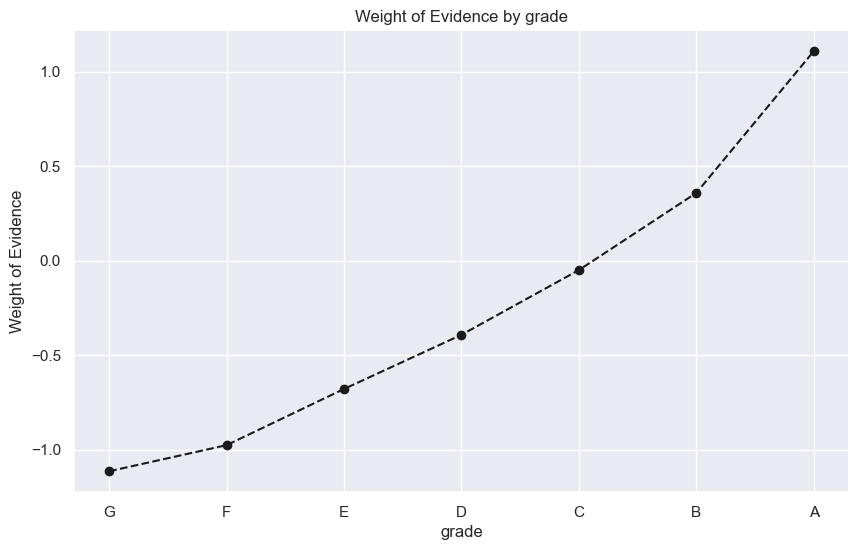

In [242]:
plot_by_woe(df_temp)

From grade vs WoE, we can notice 

- WoE的单调性是用logistic regression的必要条件
- sd

### Categorical: home_ownership

We have plotted discrete variables and calculated WoE

In [243]:
df_temp = woe_discrete(df_inputs_prepr,
                       'home_ownership',
                       df_targets_prepr,)
df_temp

,home_ownership,n_obs,prop_good,prob_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


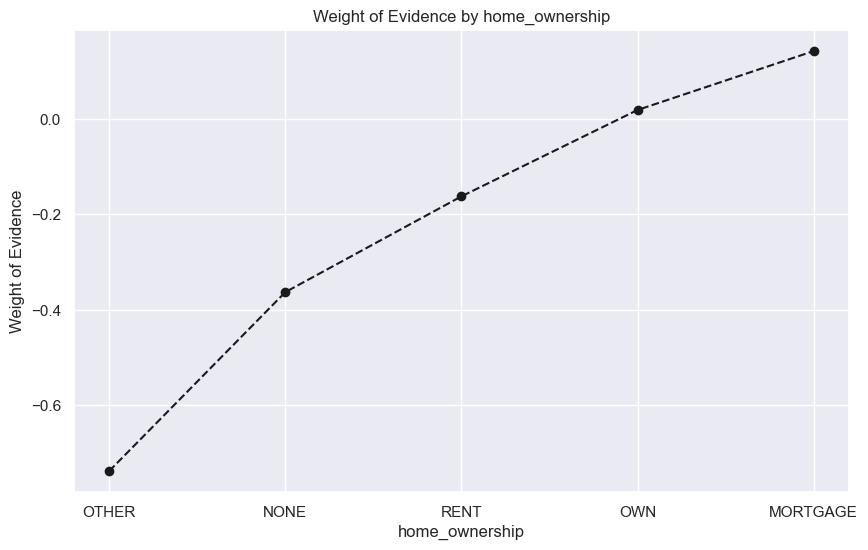

In [244]:
plot_by_woe(df_temp)

We can notice a couple of things for `home_ownership` category,
- ANY, OTHER, NONE has very small sample size. Need to lump them with a column `RENT` into a category with meaningful sample size, the closest one being RENT
    - You could also just simply lose those data but we will lose customer information
- `OWN` and `MORTGAGE` get a dummy variable of each

In [247]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                            df_inputs_prepr['home_ownership:NONE'],
                                                            df_inputs_prepr['home_ownership:ANY'],
                                                            df_inputs_prepr['home_ownership:OTHER'],])

In [249]:
df_inputs_prepr[['home_ownership:RENT_OTHER_NONE_ANY',
                 'home_ownership:RENT',
                 'home_ownership:NONE',
                 'home_ownership:ANY',
                 'home_ownership:OTHER']]

,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:RENT,home_ownership:NONE,home_ownership:ANY,home_ownership:OTHER
427211,0,False,False,False,False
206088,0,False,False,False,False
136020,0,False,False,False,False
412305,1,True,False,False,False
36159,0,False,False,False,False
...,...,...,...,...,...
259178,0,False,False,False,False
365838,1,True,False,False,False
131932,1,True,False,False,False
146867,0,False,False,False,False


In [251]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'].describe()

count    373028.000000
mean          0.404198
std           0.490737
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: home_ownership:RENT_OTHER_NONE_ANY, dtype: float64

### Categorical: addr_state

Now we look into

In [252]:
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [253]:
df_temp = woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr,)
df_temp

,addr_state,n_obs,prop_good,prob_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf
